# Assignment - 24 - MACHINE LEARNING - 5
## By Prakash Ghosh
---

### Problem Statement: 
### Build the Random Forest Model after normalizing the variable to House Pricing from Boston Dataset.
---

### Solution:
---

In [1]:
# Loading Data and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error
from scipy.stats import spearmanr, pearsonr

In [2]:
# Create Datsframe from boston dataset
boston = datasets.load_boston()
features = pd.DataFrame(boston.data, columns=boston.feature_names)
targets = boston.target
# Show features (first 2 rows)
features.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [3]:
#  Description of boston dataset
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

---
### Data Exploration
* Structure of data

In [4]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [5]:
# Combine Feature and Target to create complete DataFrame
df_boston=features
df_boston['PRICE']= boston.target 
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
# Statictical observation
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


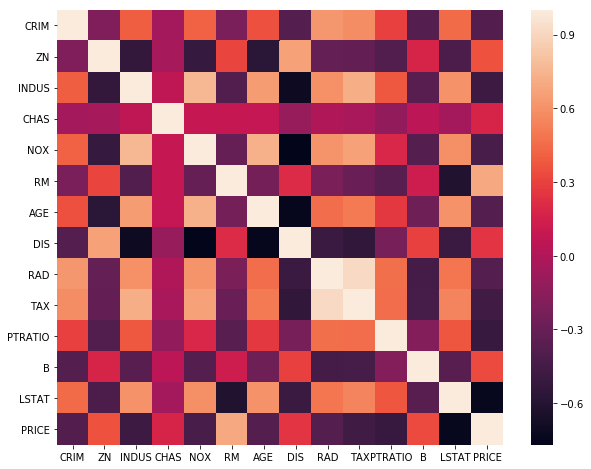

In [7]:
# Visual analysis between target variable and other features

#Show the Coorelations in the Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_boston.corr())
plt.show()

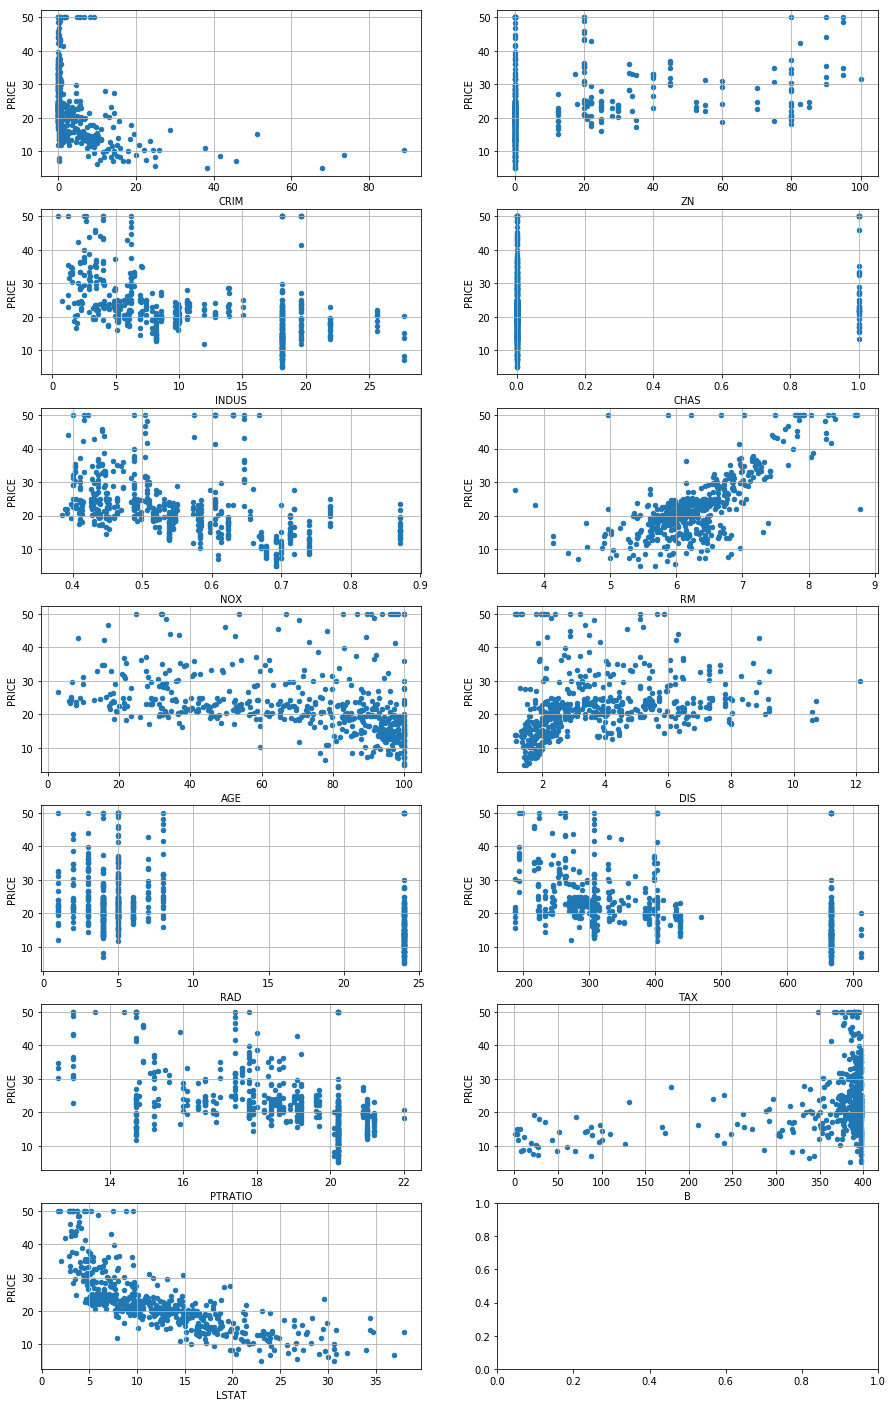

In [8]:
# Show the Correlation between target variable and other features using scatter plot
fig, axs = plt.subplots(7, 2 , sharey=False)
df_boston.plot(kind='scatter', x=df_boston.columns[0], y='PRICE', ax=axs[0][0] , figsize=(15,25) , grid=True )
df_boston.plot(kind='scatter', x=df_boston.columns[1], y='PRICE', ax=axs[0][1], grid=True)
df_boston.plot(kind='scatter', x=df_boston.columns[2], y='PRICE', ax=axs[1][0], grid=True)
df_boston.plot(kind='scatter', x=df_boston.columns[3], y='PRICE', ax=axs[1][1], grid=True)
df_boston.plot(kind='scatter', x=df_boston.columns[4], y='PRICE', ax=axs[2][0], grid=True)
df_boston.plot(kind='scatter', x=df_boston.columns[5], y='PRICE', ax=axs[2][1], grid=True)
df_boston.plot(kind='scatter', x=df_boston.columns[6], y='PRICE', ax=axs[3][0], grid=True)
df_boston.plot(kind='scatter', x=df_boston.columns[7], y='PRICE', ax=axs[3][1], grid=True)
df_boston.plot(kind='scatter', x=df_boston.columns[8], y='PRICE', ax=axs[4][0], grid=True)
df_boston.plot(kind='scatter', x=df_boston.columns[9], y='PRICE', ax=axs[4][1], grid=True)
df_boston.plot(kind='scatter', x=df_boston.columns[10], y='PRICE', ax=axs[5][0], grid=True)
df_boston.plot(kind='scatter', x=df_boston.columns[11], y='PRICE', ax=axs[5][1], grid=True)
df_boston.plot(kind='scatter', x=df_boston.columns[12], y='PRICE', ax=axs[6][0], grid=True)
plt.show()

#### Split the Target variable and Feature variable into Train and Test dataset

In [9]:
# Train set 70%, Test set 30%
X_train, X_test, y_train, y_test = train_test_split(df_boston[boston.feature_names], 
                                                    df_boston['PRICE'], 
                                                    test_size=0.3,
                                                    random_state=1)
print("X_train:\t" , X_train.shape)
print("y_train:\t" , y_train.shape)

print("X_test:\t\t" , X_test.shape)
print("y_test:\t\t" , y_test.shape)

X_train:	 (354, 13)
y_train:	 (354,)
X_test:		 (152, 13)
y_test:		 (152,)


### Random Forest Model

In [10]:
#  Define Random Forest Regression with train data
rf = RandomForestRegressor(n_estimators=50, oob_score=True, random_state=1)
rf.fit(X_train, y_train)

# Create Prediction for both train and test
predicted_train = rf.predict(X_train)
predicted_test = rf.predict(X_test)

print("The Predicted Price for Train data (First 5 rows):\t", predicted_train[0:5])
print("The Predicted Price for Test data (First 5 rows):\t", predicted_test[0:5])

The Predicted Price for Train data (First 5 rows):	 [19.67  17.514 13.462 30.196 26.554]
The Predicted Price for Test data (First 5 rows):	 [29.96  27.826 19.964 21.122 20.304]


In [11]:
# Check different parameter related to the Model
oob_score = rf.oob_score_
r2_score_test = r2_score(y_test, predicted_test)
spearman_correlation =spearmanr(y_test, predicted_test)
pearson_correlation = pearsonr(y_test, predicted_test)

print('oob_score: \t\t',oob_score)
print('r2_score_test: \t\t',r2_score_test)
print('spearman_correlation: \t', spearman_correlation[0])
print('pearson_correlation: \t', pearson_correlation[0])

# Train Dataset
no_of_tree= len(rf.estimators_)
accuracy_score_train= rf.score(X=X_train, y=y_train)
mean_abs_error_train= mean_absolute_error(y_train , predicted_train)
mean_squared_error_train= mean_squared_error(y_train , predicted_train)
root_mean_squared_error_train = np.sqrt(mean_squared_error_train)

print('\nTrain Dataset:')
print('no_of_tree: \t\t\t',no_of_tree)
print('accuracy_score_train: \t\t',accuracy_score_train)
print('mean_abs_error_train: \t\t', mean_abs_error_train)
print('mean_squared_error_train: \t', mean_squared_error_train)
print('root_mean_squared_error_train: \t', root_mean_squared_error_train)

# Test Dataset
no_of_tree= len(rf.estimators_)
accuracy_score_test= rf.score(X=X_test, y=y_test)
mean_abs_error_test= mean_absolute_error(y_test , predicted_test)
mean_squared_error_test= mean_squared_error(y_test , predicted_test)
root_mean_squared_error_test = np.sqrt(mean_squared_error_test)

print('\nTest Dataset:')
print('no_of_tree: \t\t\t',no_of_tree)
print('accuracy_score_test: \t\t',accuracy_score_test)
print('mean_abs_error_test: \t\t', mean_abs_error_test)
print('mean_squared_error_test: \t', mean_squared_error_test)
print('root_mean_squared_error_test: \t', root_mean_squared_error_test)

oob_score: 		 0.8566200860402604
r2_score_test: 		 0.8973029801175374
spearman_correlation: 	 0.9267454184299099
pearson_correlation: 	 0.9529694125360377

Train Dataset:
no_of_tree: 			 50
accuracy_score_train: 		 0.9800864947632482
mean_abs_error_train: 		 0.8634971751412422
mean_squared_error_train: 	 1.6167588361581893
root_mean_squared_error_train: 	 1.2715183192381418

Test Dataset:
no_of_tree: 			 50
accuracy_score_test: 		 0.8973029801175374
mean_abs_error_test: 		 2.3524473684210525
mean_squared_error_test: 	 9.412642684210528
root_mean_squared_error_test: 	 3.0680030450132425


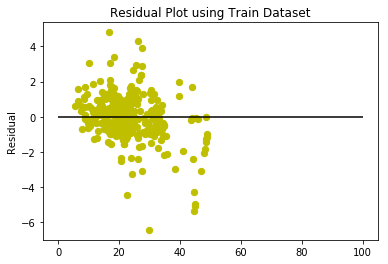

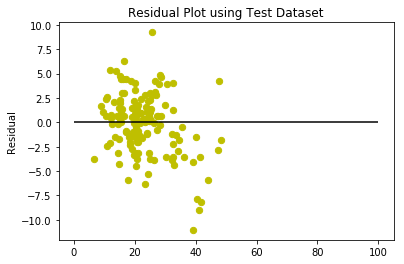

In [12]:
#Plot using Train Data with caluclated Residual
plt.scatter(predicted_train,(predicted_train-y_train),c='y',s=40)
plt.hlines(y=0,xmin=0,xmax=100)
plt.title('Residual Plot using Train Dataset')
plt.ylabel('Residual')
plt.show()

#Plot using Test Data with caluclated Residual
plt.scatter(predicted_test,(predicted_test-y_test),c='y',s=40)
plt.hlines(y=0,xmin=0,xmax=100)
plt.title('Residual Plot using Test Dataset')
plt.ylabel('Residual')
plt.show()

<b>Observation:</b>
The Residual are randomly scattered around line zero for both Train and Test Dataset. So it can be considereded as Good Model.


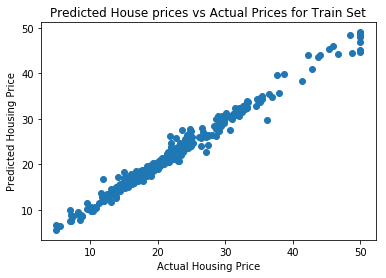

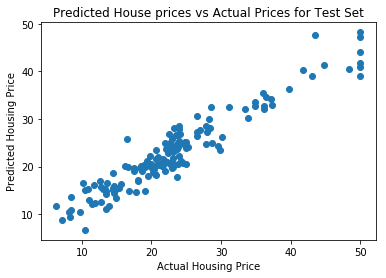

In [13]:
#Visulaize with both Actual Price and Predicted price

plt.scatter(y_train, rf.predict(X_train[boston.feature_names]))
plt.title('Predicted House prices vs Actual Prices for Train Set')
plt.ylabel('Predicted Housing Price')
plt.xlabel('Actual Housing Price')
plt.show()

plt.scatter(y_test, rf.predict(X_test[boston.feature_names]))
plt.title('Predicted House prices vs Actual Prices for Test Set')
plt.ylabel('Predicted Housing Price')
plt.xlabel('Actual Housing Price')
plt.show()